# Introduction
In this notebook we will look at how scoring has changed from the 2004 season to 2019 season.

# Notebook Objectives
We are interested in one question:
1. Do teams score more than in the past?

# Setup
## Imports

In [11]:
from datetime import datetime, timedelta

import pandas as pd

import numpy as np

import matplotlib.pylab as plt
from matplotlib.ticker import ScalarFormatter, StrMethodFormatter
import matplotlib.patches as mpatches

import seaborn as sns

## Parameters

In [12]:
GAMES_DATASET = '../../../data/processed/001_base_games.csv'

## Configuration

In [13]:
%matplotlib inline

sns.set_context('talk')
sns.set_style("white")

# Read in data

In [14]:
points_df = pd.read_csv(GAMES_DATASET, parse_dates=['GAME_DATE_EST'])
points_df.dtypes

GAME_DATE_EST       datetime64[ns]
GAME_ID                      int64
GAME_STATUS_TEXT            object
HOME_TEAM_ID                 int64
VISITOR_TEAM_ID              int64
SEASON                       int64
TEAM_ID_home                 int64
PTS_home                   float64
FG_PCT_home                float64
FT_PCT_home                float64
FG3_PCT_home               float64
AST_home                   float64
REB_home                   float64
TEAM_ID_away                 int64
PTS_away                   float64
FG_PCT_away                float64
FT_PCT_away                float64
FG3_PCT_away               float64
AST_away                   float64
REB_away                   float64
HOME_TEAM_WINS               int64
dtype: object

In [15]:
points_df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2020-12-19,12000047,Final,1610612753,1610612766,2020,1610612753,120.0,0.433,0.792,...,23.0,50.0,1610612766,117.0,0.444,0.864,0.439,21.0,52.0,1
1,2020-12-19,12000048,Final,1610612764,1610612765,2020,1610612764,99.0,0.427,0.625,...,24.0,45.0,1610612765,96.0,0.402,0.647,0.326,18.0,51.0,1
2,2020-12-19,12000049,Final,1610612763,1610612737,2020,1610612763,116.0,0.400,0.744,...,21.0,43.0,1610612737,117.0,0.422,0.837,0.297,24.0,47.0,0
3,2020-12-18,12000039,Final,1610612754,1610612755,2020,1610612754,107.0,0.371,0.692,...,19.0,45.0,1610612755,113.0,0.533,0.629,0.355,23.0,48.0,0
4,2020-12-18,12000040,Final,1610612761,1610612748,2020,1610612761,105.0,0.380,0.737,...,27.0,37.0,1610612748,117.0,0.534,0.741,0.514,30.0,51.0,0


In [16]:
points_df.groupby(['SEASON']).mean()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
SEASON,,,,,,,,,,,,,,,,,,
2003,2.145919e+07,1.610613e+09,1.610613e+09,1.610613e+09,94.907465,0.445108,0.748642,0.342993,22.056765,43.173406,1.610613e+09,91.092535,0.431240,0.750990,0.330227,20.262053,41.241058,0.622084
2004,2.128163e+07,1.610613e+09,1.610613e+09,1.610613e+09,98.604993,0.454632,0.756231,0.354970,21.928781,42.533040,1.610613e+09,95.381791,0.441678,0.752280,0.346637,20.240088,41.000000,0.604993
2005,2.095446e+07,1.610613e+09,1.610613e+09,1.610613e+09,98.406425,0.460089,0.744709,0.350063,21.152235,41.799581,1.610613e+09,95.172486,0.448051,0.742950,0.355920,19.689944,39.972067,0.604749
2006,2.093882e+07,1.610613e+09,1.610613e+09,1.610613e+09,99.849190,0.462074,0.748553,0.353187,22.004933,41.609584,1.610613e+09,96.944327,0.450718,0.748125,0.348088,20.223397,40.442565,0.591261
2007,2.124626e+07,1.610613e+09,1.610613e+09,1.610613e+09,101.273565,0.463230,0.757163,0.359906,22.496811,42.702339,1.610613e+09,97.549256,0.448358,0.752360,0.352690,20.579022,41.146704,0.610914
2008,2.122160e+07,1.610613e+09,1.610613e+09,1.610613e+09,100.922807,0.463702,0.766348,0.363791,21.588070,41.960000,1.610613e+09,97.903860,0.451627,0.767012,0.357941,20.002105,40.530526,0.601404
2009,2.126572e+07,1.610613e+09,1.610613e+09,1.610613e+09,101.654494,0.465970,0.757674,0.349756,21.884831,42.205758,1.610613e+09,98.745787,0.456085,0.754971,0.350468,20.259831,41.030899,0.601826
2010,2.135920e+07,1.610613e+09,1.610613e+09,1.610613e+09,100.756681,0.463857,0.763982,0.355870,21.976090,41.908579,1.610613e+09,97.384669,0.450444,0.759762,0.348895,20.533052,40.860759,0.612518
2011,2.235046e+07,1.610613e+09,1.610613e+09,1.610613e+09,97.392210,0.453630,0.753493,0.344514,21.380435,42.860507,1.610613e+09,94.429348,0.441467,0.751953,0.338460,20.115036,41.421196,0.594203


## Basic plot
First let's get a basic idea of the shape of the graph

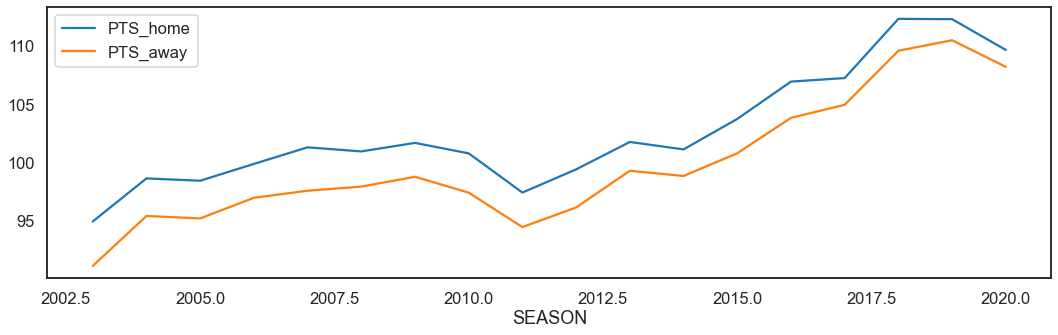

In [19]:
points_df.groupby(['SEASON']).mean()[['PTS_home', 'PTS_away']].plot(figsize=(18,5))

## Final plot
I found a clear dip in the mean scoring for the 2011 season. After some research I discovered there was a strike in 2011 that impeded the practice of every team in the league. I will mark this with a dashed line on the graph.<br><br>
I also want to highlight the Golden State Warrior dynasty team because I believe this team is largely responsible for the rise in points per game.

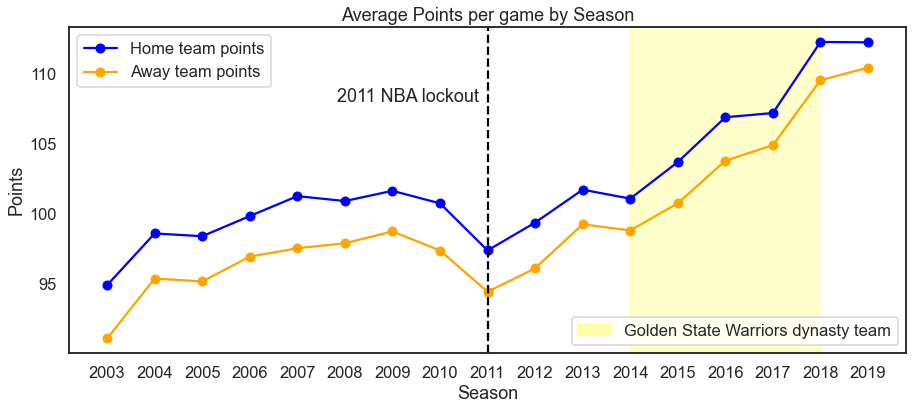

In [21]:
fig, ax = plt.subplots(figsize=(15,6))

x = points_df.groupby(['SEASON']).mean()
x = x.loc[2003:2019]

ax.plot(x['PTS_home'], label="Home team points", marker='o', color='blue')
ax.plot(x['PTS_away'], label="Away team points", marker='o', color='orange')

ax.set_xlabel('Season')
ax.set_ylabel('Points')
ax.set_xticks([2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])

plt.axvline(x=2011, color='black', linestyle='--')

gsw = plt.axvspan(2014, 2018, color='yellow', alpha=0.2)

plt.text(2007.84,108,'2011 NBA lockout')

leg1 = plt.legend(loc='upper left')
ax.legend([gsw],['Golden State Warriors dynasty team'], loc="lower right")
yellow_patch = mpatches.Patch(color='yellow', alpha=0.3, label='Golden State Warriors dynasty team')
plt.legend(handles=[yellow_patch], loc='lower right')
ax.add_artist(leg1)

ax.set_title('Average Points per game by Season')

plt.savefig('../../../graphs/1000_points_by_season.png',bbox_inches='tight');

# Clear dataframes
This project contains many dataframes. To make sure we don't run out of memory we will delete our dataframes at the end of each notebook.

In [9]:
%reset -f